In [1]:
#MNIST model through segmented image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import scipy

Using TensorFlow backend.
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
img = Image.open('pricelabel_digit2.jpg' )
img.load()
img = img.convert('1')
data = np.asarray( img, dtype="int32" )

Text(0.5, 1.0, 'Input Image')

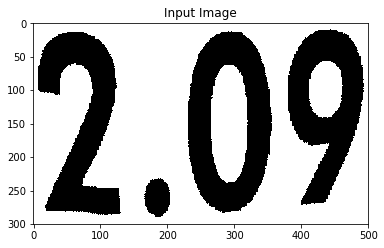

In [3]:
plt.imshow(data,'gray')
plt.title("Input Image")

In [4]:
#slice "data" into grids of side "grid"
def slice(data,grid):
    #height, width, channels=data.shape
    height, width=data.shape
    h2=height//grid
    w2=width//grid
    data3=[]
    sum_row=0
    for i in range(0,grid):
        sum_column=0
        for j in range(0,grid):
            data_temp=data[sum_row:sum_row+h2,sum_column:sum_column+w2]
            data3.append(data_temp)
            sum_column+=w2
        sum_row+=h2
    return np.array(data3)
def plot_grid(data2,grid):
    for i in range(1, grid*grid+1):
        plt.subplot(grid, grid, i)
        plt.imshow(data2[i-1],'gray')
        plt.xticks([])
        plt.yticks([])
        plt.suptitle('Preprocessed Image', y=1.05, fontsize=24)

def get_centroids(grid,individual_height,individual_width):
    centroids=[]
    h_sum=0
    for i in range(0,grid):
        w_sum=0
        for j in range(0,grid):
            centroids.append([individual_height/2+h_sum,individual_width/2+w_sum])
            w_sum+=individual_width
        h_sum+=individual_height
    centroids=np.array(centroids)
    return centroids

def difference_between(a,b):
    return abs(a-b)

def get_slices(image,centroids,individual_height,individual_width,orig_height,orig_width):
    data2=[]
#     print('before individual_height',individual_height)
#     print('before individual_width',individual_width)
    
    individual_height=int(individual_height)
    individual_width=int(individual_width)
    
#     print('after individual_height',individual_height)
#     print('after individual_width',individual_width)
    
#     print()
#     print('orig_height',orig_height)
#     print('orig_width',orig_width)
    for centroid in centroids:
        centroid[0]=int(centroid[0])
        centroid[1]=int(centroid[1])
        
#         print("height",centroid[0],"width",centroid[1])
#         print()
        
        crop=np.zeros((individual_height,individual_width))
                
        crop_lower_height=0
        crop_upper_height=individual_height
        crop_lower_width=0
        crop_upper_width=individual_width
        lower_height=int(centroid[0]-individual_height/2)
        upper_height=int(centroid[0]+individual_height/2)
        lower_width=int(centroid[1]-individual_width/2)
        upper_width=int(centroid[1]+individual_width/2)
        
        #basically make sure crop_upper_width - crop_lower_width= upper_width - lower_width
        while (difference_between(crop_upper_width,crop_lower_width)!=difference_between(upper_width,lower_width)):
            crop_upper_width-=1
        
        big_image_lower_height=0
        big_image_upper_height=orig_height
        big_image_lower_width=0
        big_image_upper_width=orig_width
        
        
        if(lower_height<big_image_lower_height):
            crop_lower_height=difference_between(big_image_lower_height,lower_height)
            lower_height=big_image_lower_height
        
        if(upper_height>big_image_upper_height):
            crop_upper_height=individual_height-difference_between(big_image_upper_height,upper_height)
            upper_height=big_image_upper_height
        
        if(lower_width<big_image_lower_width):
            crop_lower_width=difference_between(big_image_lower_width,lower_width)
            lower_width=big_image_lower_width
        
        if(upper_width>big_image_upper_width):
            crop_upper_width=individual_width-difference_between(big_image_upper_width,upper_width)
            upper_width=big_image_upper_width
        
        
        crop[crop_lower_height:crop_upper_height,crop_lower_width:crop_upper_width]=image[lower_height:upper_height,lower_width:upper_width]
#         alternatively comment above statement and while loop
#         and uncomment below statements
#         size=difference_between(crop_lower_height,crop_upper_height),difference_between(crop_lower_width,crop_upper_width)
#         crop[crop_lower_height:crop_upper_height,crop_lower_width:crop_upper_width]=scipy.misc.imresize(image[lower_height:upper_height,lower_width:upper_width],size)
        data2.append(crop)
    return np.array(data2)


In [5]:
#orig_height, orig_width, orig_channels=data.shape
orig_height, orig_width=data.shape

data.shape

(300, 500)

In [6]:
grid=3
#data2=slice(data,grid)
#get_slices2(image,centroids,individual_height,individual_width,orig_height,orig_width)
individual_height=orig_height//grid
individual_width=orig_width//grid

In [7]:
centroids=get_centroids(grid,individual_height,individual_width)
centroids.shape

(9, 2)

In [8]:
data2=get_slices(data,centroids,individual_height*2,individual_width,orig_height,orig_width)
#data2=slice(data,grid)

In [9]:
data2.shape

(9, 200, 166)

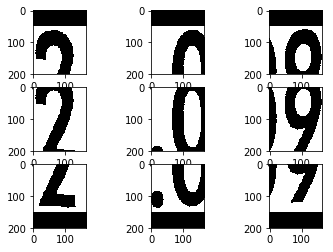

In [10]:
for i in range(1, grid*grid+1):
    plt.subplot(grid, grid, i)
    plt.imshow(data2[i-1],'gray')
#plt.savefig('sliced.jpg')

In [11]:
#RUN these through MNIST model

In [12]:
reload_filename='MNISTMLP.hdf5'
model = load_model(reload_filename)

In [13]:
data2.shape

(9, 200, 166)

In [14]:
#have to convert image to black and white

In [15]:
size=28,28
temp=[]
for i in range(0,data2.shape[0]):
    temp.append(scipy.misc.imresize(data2[i],size))
temp=np.array(temp)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


In [16]:
num,dim,_=temp.shape
temp.shape

(9, 28, 28)

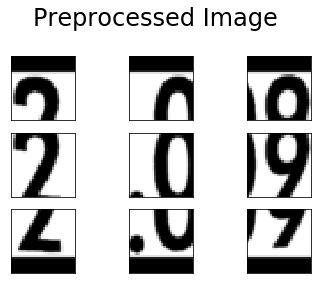

In [17]:
for i in range(1, grid*grid+1):
    plt.subplot(grid, grid, i)
    plt.imshow(temp[i-1],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Preprocessed Image', y=1.05, fontsize=24)

In [18]:
train_data = temp.reshape(num, dim*dim)

In [19]:
train_data = train_data.astype('float32')
train_data /= 255

In [20]:
train_data.shape

(9, 784)

In [21]:
results=model.predict(train_data)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


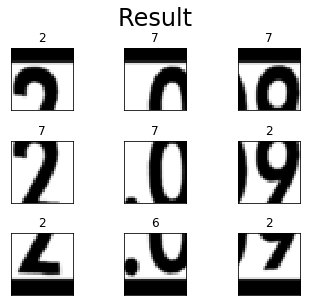

In [22]:
for i in range(1, grid*grid+1):
    plt.subplot(grid, grid, i).set_title(np.argmax(results[i-1]))
    plt.imshow(temp[i-1],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.suptitle('Result', y=1.05, fontsize=24)
    plt.tight_layout(rect=[1, 1, 0.8, 1])

In [71]:
#have to get a more robust model
#and a better sliding window model

In [ ]:
#so now have to train model to tell which is back ground and which is foreground

Prediction for single image

In [92]:
img2 = Image.open('pricelabel_digit.jpg' )
img2.load()
img2 = img2.convert('1')
data_digit = np.asarray( img2, dtype="int32" )

Text(0.5, 1.0, 'Input Image')

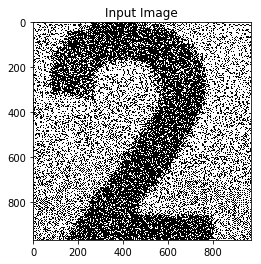

In [99]:
plt.imshow(data_digit,'gray')
plt.title("Input Image")

In [110]:
size=28,28
temp2=[]
temp2.append(scipy.misc.imresize(data_digit,size))
temp2=np.array(temp2)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
temp2.shape

(1, 28, 28)

Text(0.5, 1.0, 'Preprocessed Image')

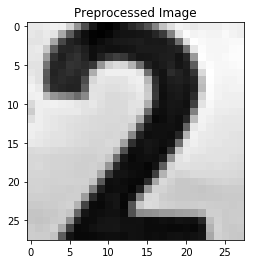

In [114]:
plt.imshow(temp2[0],'gray')
plt.title("Preprocessed Image")

In [121]:
dim=28

In [122]:
train_data2 = temp2.reshape(1,dim*dim)

In [123]:
train_data2 = train_data2.astype('float32')
train_data2 /= 255

In [150]:
reload_filename2='TFKeras.h5'
model2 = load_model(reload_filename2)

In [151]:
np.argmax(model2.predict(train_data2))

5